# **Variational Quantum Mechanics**

#### Matthew Smith

## **Imports and Commands**

In [1]:
import diag
import numpy
import matplotlib.pyplot as pyplot

$$\newcommand{\bra}[1]{\langle #1 \vert}$$
$$\newcommand{\ket}[1]{\vert #1 \rangle}$$
$$\newcommand{\braket}[2]{\langle #1 \vert #2 \rangle}$$
$$\newcommand{\hbraket}[3]{\langle #1 \vert #2 \vert #3 \rangle}$$

## **Constants**

In [2]:
global hbar
hbar = 1.0

## **Introduction**

Problems in quantum mechanics largely consist of searching for the energies possessed and wavefunctions followed by a particle in a potential field. This is generally done by solving the (Time-Independent) Schrodinger Equation:

$$\dfrac{-\hbar^2}{2m}\nabla^2 \psi + V\psi = E\psi$$

Unfortunately, there are very few potential functions $V$, for which this equation may be solved using standard analytical methods. The exceptions to this rule include the infinite/finite potential well, the harmonic potential, and the hydrogen atom. We thus turn to using approximation techniques.

One such technique that is of use, is the Rayleigh-Ritz Variational Method. 

## **Theory**

The variational approach to quantum mechanics, begins with defining an energy functional from Bransden and Jochain 8.3. 

$$E[\phi]  := \dfrac{\hbraket{\phi}{H}{\phi}}{\braket{\phi}{\phi}} \text{ ,}$$

where $H$ is the Hamiltonian operator. Note than if $\psi_n$ is an eigenfunction of $H$ (i.e. $H\psi_n = E_n \psi_n$) we have,

$$E[\psi] = \dfrac{\hbraket{\psi_n}{H}{\psi_n}}{\braket{\psi_n}{\psi_n}} = \dfrac{E_n \braket{\psi_n}{\psi_n}}{\braket{\psi_n}{\psi_n}} = E_n \text{ .}$$

To investigate the behaviour of the function, we first rearrange the definition. 

$$\braket{\phi}{\phi} E[\phi] = \hbraket{\phi}{H}{\phi} \text{ (1)}$$

Introducing a small variation $\delta \phi$, 

$$\braket{\phi + \delta \phi}{\phi + \delta \phi}E[\phi + \delta \phi] = \hbraket{\phi + \delta \phi}{H}{\phi + \delta + \phi} \text{ .}$$

Expanding the inner products,

$$\left( \braket{\phi}{\phi} + \braket{\delta \phi}{\phi} + \braket{\phi}{\delta} + \braket{\delta \phi}{\delta \phi}\right) E[\phi + \delta \phi] = \hbraket{\phi}{H}{\phi} + \hbraket{\phi}{H}{\phi + \delta \phi} + \hbraket{\phi + \delta \phi}{H}{\phi} + \hbraket{\delta \phi}{H}{\delta \phi} \text{ (2)}$$

Letting $E[\phi] = E$, $E[\phi + \delta \phi] = E + \delta E$, and taking the difference of (1) and (2) we get,

$$\left( \braket{\delta \phi}{\phi} + \braket{\phi}{\delta} + \braket{\delta \phi}{\delta \phi} \right)(E + \delta E) + \braket{\phi}{\phi} \delta E = \hbraket{\phi}{H}{\phi + \delta \phi} + \hbraket{\phi + \delta \phi}{H}{\phi} + \hbraket{\delta \phi}{H}{\delta \phi} \text{ .}$$

Now set $\delta E = 0$ and neglect all terms second order in variation or higher. 

$$\left( \braket{\delta \phi}{\phi} + \braket{\phi}{\delta} \right)E = \hbraket{\phi}{H}{\phi + \delta \phi} + \hbraket{\phi + \delta \phi}{H}{\phi}$$

This immediately implies,

$$\hbraket{\delta \phi}{H - E}{\phi} + \hbraket{\phi}{H - E}{\delta \phi} = 0 \implies \hbraket{\delta \phi}{H - E}{\phi} + \hbraket{\delta \phi}{H - E}{\phi}^* = 0 \text{ .}$$

Therefore,

$$\hbraket{\delta \phi}{H - E}{\phi} = 0 \implies (H - E)\ket{\phi} = 0 \text{ .}$$

A simple rearrangment then gives,

$$H \ket{\phi} = E \ket{\phi} \text{ .}$$

This is the Schrodinger Equation. We this see that the problem of minimising the energy functional $E[\phi]$ is equivalent to solving the Schrodinger Equation.

A proof is given by Bransden and Jochain, that the energy function always bounds the ground state energy from above. Let $\psi_n$ be the orthonormal eigenfunctions of $H$. Then any square-integrable function in the space spanned by $\psi_n$ is given by,

$$\phi = \sum_n {a_n \psi_n} \text{ .}$$

Hence,

$$E[\phi] = \dfrac{\hbraket{\phi}{H}{\phi}}{\braket{\phi}{\phi}} = \dfrac{\hbraket{\sum_n {a_n \psi_n}}{H}{\sum_n {a_n \psi_n}}}{\braket{\sum_n {a_n \psi_n}}{\sum_n {a_n \psi_n}}} = \dfrac{\sum_n E_n |a_n|^2 \braket{\psi_n}{\psi_n}}{\sum_n |a_n|^2 \braket{\psi_n}{\psi_n}} = \dfrac{\sum_n E_n |a_n|^2 }{\sum_n |a_n|^2} \text{ .}$$

Now consider the difference with the groun state energy $E_0$,

$$E[\phi] - E_0 = \dfrac{\sum_n E_n |a_n|^2 }{\sum_n |a_n|^2} - E_0 = \dfrac{\sum_n E_n |a_n|^2 }{\sum_n |a_n|^2} - \dfrac{E_0 \sum_n |a_n|^2}{\sum_n |a_n|^2} = \dfrac{\sum_n |a_n|^2 (E_n - E_0)}{\sum_n |a_n|^2} \geq 0$$

Therefore,

$$E_0 \leq E[\phi] \text{ .}$$

This makes the functional a good tool for approximating $E_0$. It is important to note however, that satisfactory results rely on a good choice of basis functions. Given a finite, $n$-dimensional orthonormal basis $\chi_i$, define the $n \times n $ Hamiltonian matrix by $H_{ij} := \hbraket{\chi_i}{H}{\chi_j}$. We then have an eigenvalue problem in the Hilbert space spanned by $\chi_k$, 

$$H \vec{C} = E \vec{C} \text{ .}$$

This system may be solved using the diagonalisation techniques covered in [this notebook](DenseMatrixDiagonalisation2.ipynb). The lowest eigenvalue is our upper bound for the ground state energy. 

We often choose a basis which is not orthonormal. In cases such as these, it is necessary to solve the generalised eigenvalue problem, 

$$H \vec{C} = E S \vec{C} \text{ ,}$$

where $S$ is is **overlap matrix**. $S := \braket{\chi_i}{\chi_j}$. 

Thijssen 3.3 describes a method to solve systems such as these. We begin by diagonalising $S$. That is, to find diagonal matrix  $s$ and unitary matrix $U$ such that,

$$s = U^* S U \text{ .}$$

Now let $V = Us^{-\frac{1}{2}}$. Then,

$$V^* S V = s^{-\frac{1}{2}} U* S U s^{-\frac{1}{2}} = I \text{ .}$$

We therefore now have a matrix $V$, such that $V*SV = I$. This allows, 

$$H \vec{C} = E S \vec{C} \implies H V V^{-1} \vec{C} = E S V V^{-1} \vec{C} \implies V^* H V V^{-1} \vec{C} = E V^* S V V^{-1} \vec{C} \implies  V^*  V V^{-1} H \vec{C} = E (V^* S V) V^{-1} \vec{C} \text{ .}$$

By the way we constructed $V$, 

$$V^* H V V^{-1} \vec{C} = E I V^{-1} \vec{C} \implies (V^* H V) (V^{-1} \vec{C}) = E (V^{-1} \vec{C}) \text{ .}$$

Therefore introducing $H' = V^* H V$, and $\vec{C}' := V^{-1} \vec{C}$, 

$$H' \vec{C}' = E \vec{C}' \text{ .}$$

We now have a standard eigenvalue problem. 

## **Implementation**

We now write the code to solve the generalised eigenvalue problem. 

In [3]:
def genSymEigenSolve(A, S, num):
    # diagonalise S
    s, U = diag.dense_sym_diagonalise_QR(S, num)
    # define transformation
    scomp = s + numpy.zeros((len(S), len(S)), dtype = complex)
    for i in range(len(scomp)): scomp[i, i] = scomp[i, i]**(-0.5)
    V = U@scomp
    Ap = numpy.transpose(V)@(A@V)
    D, Pp = diag.dense_sym_diagonalise_QR(Ap, num)
    P = V@Pp
    P = numpy.real(P)
    D = numpy.real(D)
    return D, P

def genHermEigenSolve(H, S, num):
    # diagonalise S
    s, U = diag.dense_herm_diagonalise_QR(S, num)
    # define transformation
    for i in range(len(s)): 
        s[i, i] = s[i, i]**(-0.5)
    V = U@s
    Hp = diag.herm(V)@(H@V)
    D, Pp = diag.dense_herm_diagonalise_QR(Hp, num)
    P = V@Pp
    return D, P

In order to use the above, we must find the $H$ and $S$ matrices externally. 

#### **Test Case: The Infinite Square Well**

In order to test our methods, we turn to an elementary quantum system. The Infinite Square Well problem places a particle of mass $m$ in a potential 'well' of width $2a$. It is defined by the potential function:

$$V(x) = \begin{cases} 0 & \text{ if } |x| \leq a \\ \infty & \text{ if } |x| \gt a \end{cases}$$

The Schrodinger Equation becomes,

$$\dfrac{-\hbar^2}{2m}\dfrac{d^2}{dx^2}\psi_n(x) = E_n \psi_n(x) \text{ ,}$$

with boundary conditions $\psi_n(-a) = \psi_n(a) = 0$. 

Bransden and Jochain 4.5 gives the analytic solution of this system: 

$$\psi_n(x) = \begin{cases} \dfrac{1}{\sqrt{a}}\sin\left(\dfrac{n\pi}{2a} x\right) & \text{ if } n \text{ even} \\ \dfrac{1}{\sqrt{a}}\cos\left(\dfrac{n\pi}{2a} x\right) & \text{ if } n \text{ odd} \end{cases} $$

$$E_n = \dfrac{\hbar^2 \pi^2 n^2}{8ma^2} \text{ .}$$

We shall now solve this using the computational methods we have been developing. First, it is necessary to choose a basis. Thijssen 3.2 reccommends the basis:

$$\chi_n(x) = x^n (x - a)(x + a) \text{ .}$$

This basis guarantees, that any linear combination will satisfy the boundary conditions. This basis also allows the analytic calculation of the necessary matrix elements. Unfortunately, this basis is not orthonormal, and so it is necessary to calculate the elements of the overlap matrix. For the sake of testing, we set $\hbar = 2m = a = 1$. 

$$S_{nm} := \braket{\chi_n}{\chi_m} = \int_{-1}^{1} x^n x^m (x - 1)^2 (x + 1)^2 dx = \cdots = \begin{cases} \dfrac{2}{n + m + 5} - \dfrac{4}{n + m + 3} + \dfrac{2}{n + m + 1} & \text{ if } n + m \text{ even} \\ 0 & \text{ if } n + m \text{ odd}\end{cases}$$

Now dealing with the Hamiltonian (from Thijssen 3.2),

$$H_{nm} = \begin{cases} -8\left(\dfrac{1 - n - m - 2nm}{(n + m + 3)(n + m + 1)(n + m - 1)} \right) & \text{ if } n + m \text{ even } \\ 0 & \text{ if } n + m \text{ odd} \end{cases}$$

We now implement the system with a dimension of $n = 5$. 

In [5]:
n = 12
H = numpy.zeros((n, n), dtype = float)
for i in range(n):
    for j in range(n):
        if((i + j) % 2 == 0):
            y = -8.0*(1.0 - i - j - 2.0*i*j)/((i + j + 3.0)*(i + j + 1.0)*(i + j - 1))
            H[i, j] = y

S = numpy.zeros((n, n), dtype = float)
for i in range(n):
    for j in range(n):
        if((i + j) % 2 == 0):
            y = 2.0/(i + j + 5.0) - 4.0/(i + j + 3.0) + 2.0/(i + j + 1.0)
            S[i, j] = y

In [7]:
D, P = genSymEigenSolve(H, S, 10000)
diff = D - diag.herm(P)@(H@P)
print(diff)
lam = numpy.zeros((len(D)), dtype = float)
for i in range(len(D)): lam[i] = D[i, i]
print(lam)

[[-2.71938916e-10  4.63274982e-13  6.80578904e-10 -4.10295314e-13
   3.39262504e-10 -4.52037281e-13 -1.64071895e-10 -2.32924531e-13
  -2.42588819e-12  1.23453637e-12  2.95125716e-12 -3.16149659e-11]
 [ 4.63277783e-13 -1.04591891e-11  8.20501865e-14 -8.21208543e-11
   1.25878859e-14 -1.27154591e-13 -2.45615576e-14  5.07541641e-13
   1.11606056e-14  1.56263944e-12  2.29032848e-13 -1.67896637e-13]
 [ 2.43499767e-10  8.20545277e-14 -5.73436409e-10  4.04809833e-14
  -3.03223350e-10 -1.35905454e-14  1.40489494e-10  5.03563877e-14
   2.75496656e-12  1.49179663e-13 -6.12737624e-13  2.44802020e-12]
 [-4.10296363e-13  1.45054466e-11  4.04806106e-14  4.82600626e-11
  -3.76507615e-14  9.16542619e-12 -1.07841664e-14 -5.19468739e-14
  -3.23180661e-14 -1.31476107e-12  1.98453993e-14 -3.64856338e-13]
 [ 1.43341976e-10  1.25899679e-14 -3.43782076e-10 -3.76501122e-14
  -1.65897518e-10  5.26952252e-14  7.13511064e-11 -2.18905298e-14
   2.87299675e-12 -8.83364351e-15  2.22422114e-13 -1.65307164e-12]
 [-4.

The above implies the ground state energy $E_1$ is bounded from above by $2.46741$. Analytically, $E_1 = \dfrac{\pi^2}{4} \approx 2.4674$. We thus see that the variational method works. We look at the corresponding eigenvector and contruct the wavefunction.

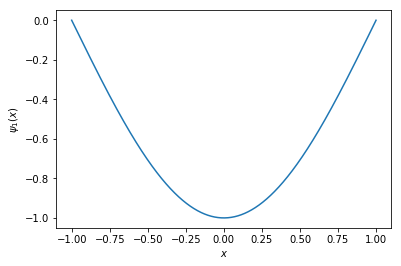

In [8]:
def basis(k, x):
    y = (x - 1)*(x + 1)*x**k
    return y

v = P[:, (n - 1):n]

X = numpy.linspace(-1.0, 1.0, 1000)
Y = X - X

for i in range(n):
    for j in range(len(X)):
        Y[j] = Y[j] +(v[i, 0]*basis(i, X[j]))
        
pyplot.figure()
pyplot.plot(X, Y)
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$\psi_1(x)$")
pyplot.show()

Qualitatively, this matches the analytic wavefunction $\psi_1(x) = \cos \left(\dfrac{\pi}{2}x\right)$, down to the sign of the constant. We may quantitatively compare the computed wavefunctions to their analytic counterparts. Note that testing for high $n$ results in a failure. It is possible that this is due to a breakdown in computer arithmetic. 

n = 1


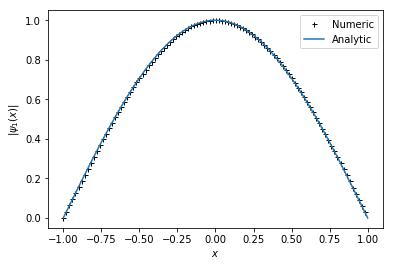

n = 2


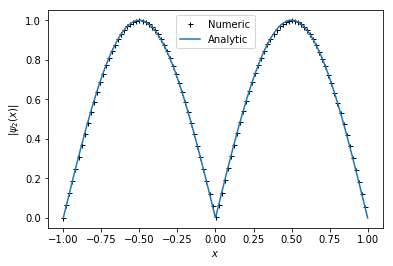

n = 3


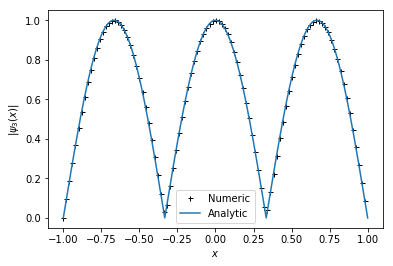

n = 4


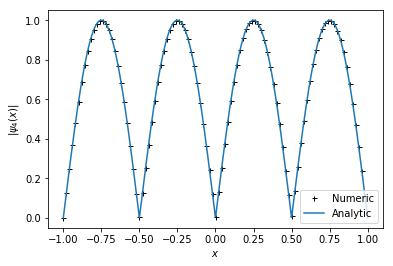

n = 5


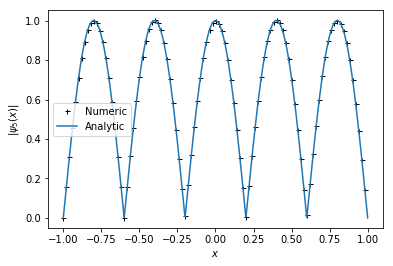

n = 6


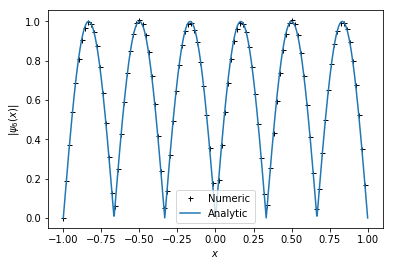

n = 7


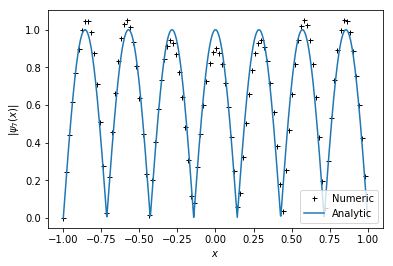

n = 8


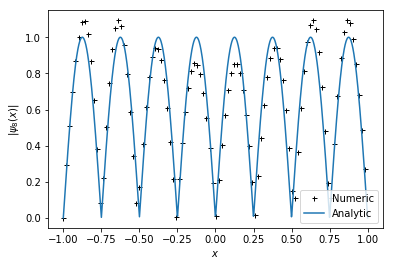

n = 9


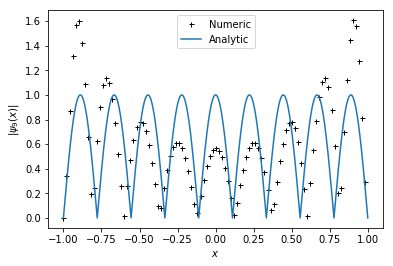

n = 10


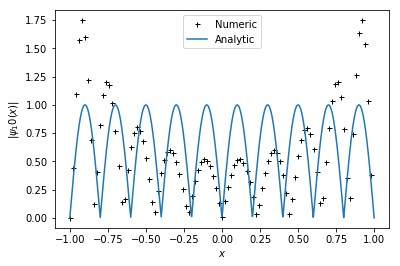

n = 11


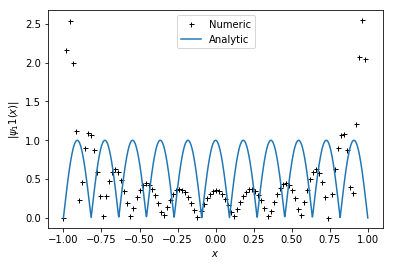

n = 12


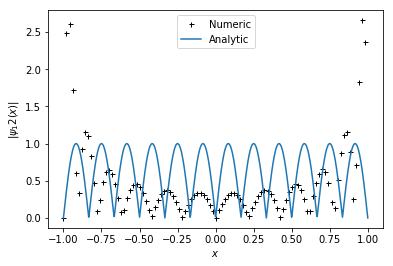

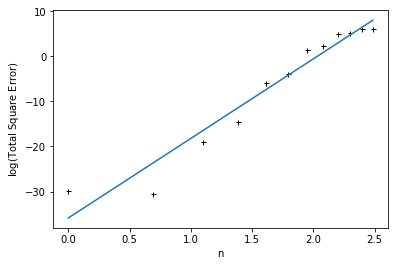

Gradient: 17.63681175783842


In [9]:
def psi(k, x):
    b = k*numpy.pi/2.0
    if(k % 2 == 0): y = numpy.sin(b*x)
    else: y = numpy.cos(b*x)
    return y

X = numpy.linspace(-1.0, 1.0, 1000)
Ynum = numpy.zeros((n, len(X)), dtype = float)
Yan = numpy.zeros((n, len(X)), dtype = float)
err = numpy.zeros((n, len(X)), dtype = float)
for k in range(n):
    v = P[:, n - k - 1]
    for i in range(n):
        for j in range(len(X)):
            Ynum[k, j] = Ynum[k, j] + v[i]*basis(i, X[j])
            Yan[k, j]  = psi(k + 1, X[j])
            err[k, j] = abs(Ynum[k, j]) - abs(Yan[k, j])

for k in range(n):
    print("n = {}".format(k + 1))
    pyplot.figure()
    pyplot.plot(X[0:len(X):10], abs(Ynum[k, :])[0:len(X):10], label = "Numeric", linestyle = "None", marker = "+", color = "k", ms = 5)
    pyplot.plot(X, abs(Yan[k, :]), label = "Analytic")
    pyplot.xlabel(r"$x$")
    pyplot.ylabel(r"$|\psi_{}(x)|$".format(k + 1))
    pyplot.legend()
    pyplot.show()
    
sq_err = numpy.zeros((n), dtype = float)
for i in range(n):
    sq_err[i] = numpy.sum(err[i, :]**2.0)
grad, intercept = numpy.polyfit(numpy.log(numpy.arange(1, n + 1)), numpy.log(sq_err), 1)
pyplot.figure()
pyplot.plot(numpy.log(numpy.arange(1, n + 1)), numpy.log(sq_err), linestyle = "None", color = "k", marker = "+", ms = 5)
pyplot.plot(numpy.log(numpy.arange(1, n + 1)), grad*numpy.log(numpy.arange(1, n + 1)) + intercept)
pyplot.xlabel(r"n")
pyplot.ylabel(r"$\log($Total Square Error$)$")
pyplot.show()


print("Gradient: {}".format(grad))

It seems the total square error in the computed $n^\text{th}$ wavefunction is polynomial in $n$.

##### **Convergence of the Test Case**

We consider the above problem and look at the convergence of the computational ground state energy to its analytic value, as the dimension of our vector space increases. 

[ 3.63050569e-05  8.47426573e-09  8.47419779e-09  6.98996416e-13
  5.20916643e-13 -7.23865412e-13 -3.19300142e-13 -4.78106443e-12
  1.38062894e-11  3.63050569e-05]


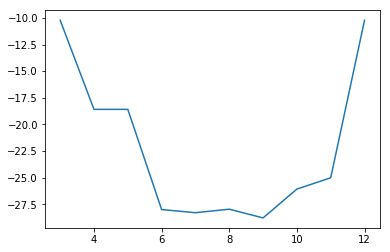

In [10]:
ERR = numpy.zeros((13 - 3), dtype = float)

E0an = 0.25*numpy.pi**2.0

for n in range(3, 13):
    H = numpy.zeros((n, n), dtype = float)
    for i in range(n):
        for j in range(n):
            if((i + j) % 2 == 0):
                y = -8.0*(1.0 - i - j - 2.0*i*j)/((i + j + 3.0)*(i + j + 1.0)*(i + j - 1))
                H[i, j] = y

    S = numpy.zeros((n, n), dtype = float)
    for i in range(n):
        for j in range(n):
            if((i + j) % 2 == 0):
                y = 2.0/(i + j + 5.0) - 4.0/(i + j + 3.0) + 2.0/(i + j + 1.0)
                S[i, j] = y
    
    D, P = genSymEigenSolve(H, S, 1000)
    
    Dabs = abs(D)
    
    lam = numpy.zeros((n), dtype = float)
    
    for i in range(n): lam[i] = D[i, i]

    E0num = min(lam)
    
    ERR[i - 3] = E0num - E0an
    
Ns = numpy.arange(3, 13)

print(ERR)

pyplot.figure()
pyplot.plot(Ns, numpy.log(abs(ERR)))
pyplot.show()

The error looks like it's following an exponential decay, up until around $n = 8$. Again, this must be due to erros in computer arithmetic. 

#### **Evaluation of Test Case**

The Infinte Square Well test case demonstrates the importance of a good basis. It is clear that using high $n$ is problematic, and hence a good basis should be chosen in order to make the most of a lower $n$. 

## **Application to the Hydrogen Atom**

In the hydrogen atom, a singular electron is described by an associated wavefunction. Since the electron occupies a Coulomb potential, the radial Schrodinger equation becomes (Thijssen 3.2.2),
$$\left( \dfrac{-\hbar^2}{2m}\nabla^2 - \dfrac{1}{4 \pi \epsilon_0} \dfrac{1}{r} \right) \psi(r) = E \psi(r) \text{ ,}$$
where $m$ is the mass of the electron (assume it is dwarfed by proton mass). Setting $\hbar = m = 4\pi\epsilon_0 = 1$,

$$\left(-\dfrac{1}{2}\nabla^2 - \dfrac{1}{r} \right) \psi(r) = E \psi(r)$$

Note that here, $E$ will be in units of Hartees, $E_H = mc^2\alpha^2$, where $\alpha$ is fine structure constant.

I apply the methods developed to find the spectrum $E_n$. First, fix a basis. The following is suggested by Thijssen. 

$$\chi_p(r) = \exp(-\alpha_p r^2)$$

$\alpha_p$ are a set of constants. These are freely chosen, but are found by other studies to have optimal values: 
$$\alpha_1 = 13.00773$$
$$\alpha_2 = 1.962079$$
$$\alpha_3 = 0.444529$$
$$\alpha_4 = 0.1219492$$
So we now construct the matrices $H$ and $S$. Thijssen is kind enough to have done the analysis. 
$$S_{pq} = \left(\dfrac{\pi}{\alpha_p + \alpha_q}\right)^{\dfrac{3}{2}}$$
$$H_{pq} = 3\left(\dfrac{\alpha_p \alpha_q \pi^{\frac{3}{2}}}{(\alpha_p + \alpha_q)^\frac{5}{2}}\right) - \dfrac{2\pi}{\alpha_p + \alpha_q}$$

So without further ado, let's solve the problem.

In [15]:
alpha = [13.00773, 1.962079, 0.444529, 0.1219492] # optimal alpha values

S = numpy.zeros((4, 4), dtype = float)
H = numpy.zeros((4, 4), dtype = float)

for p in range(4):
    for q in range(4):
        S[p, q] = (numpy.pi/(alpha[p] + alpha[q]))**1.5
        H[p, q] = (3.0*alpha[p]*alpha[q]*numpy.pi**1.5)/(alpha[p] + alpha[q])**2.5 - 2.0*numpy.pi/(alpha[p] + alpha[q])
        
D, P = genSymEigenSolve(H, S, 10000)

print(D)

[[21.14436519  0.          0.          0.        ]
 [ 0.          2.59229957  0.          0.        ]
 [ 0.          0.         -0.49927841  0.        ]
 [ 0.          0.          0.          0.11321392]]


See that the ground energy is $-0.49927841 E_H = (-0.49927841) (mc^2 \alpha^2) = -13.6 \text{ eV}$ (3 s.f.)

So our method has returned something that is in agreement with the standard value. Note that the other energies do not represent bound states, since they are positive. 

## **Conclusions**

The purpose of this notebook was to test the Householder method on a real problem. Here, we only considered relatively simple systems, which were analytically solvalble. We were successful in this. The ideas here will be extended in a future notebook, where we may consider many electron systems.  

## **References**

**Books**

*Computational Physics* by Thijssen; Second Edition (2007); Cambridge University Press; ISBN-978-1-107-67713-5.

*Introduction to Quantum Mechanics* by Bransden and Jochain; (1989); Longman Group UK Limited; ISBN-0-582-44498-5.  